## Prophet Trend Changes

In [2]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Udacity Time Series Analysis in Python\\Time Series contd\\Hospitality Employees.csv")

In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

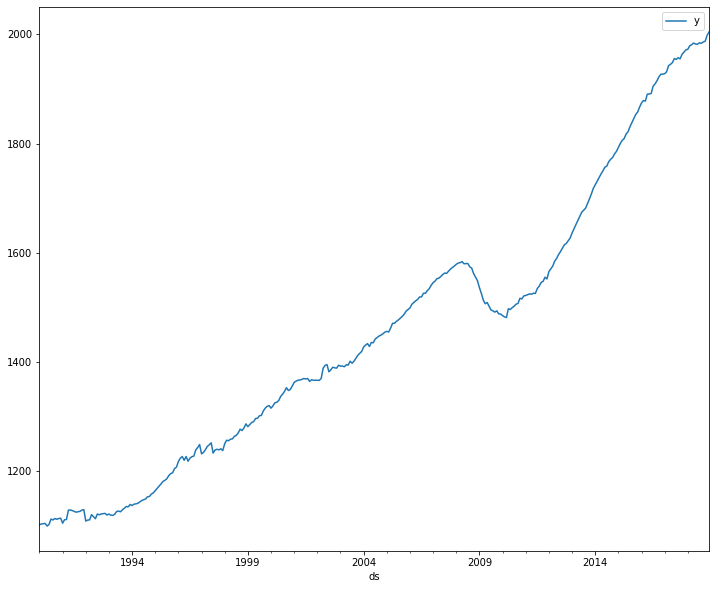

In [10]:
pd.plotting.register_matplotlib_converters()
df.plot(x='ds',y='y', figsize=(12,10))

In [12]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forcast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


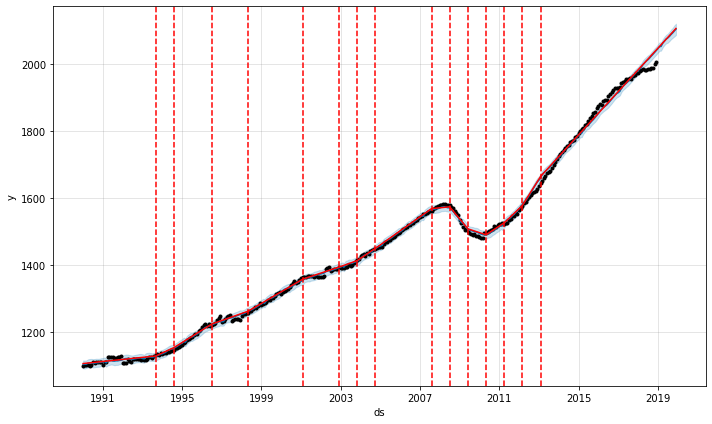

In [14]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forcast)
a= add_changepoints_to_plot(fig.gca(),m,forcast)


## Prophet Seasonality Changes

In [15]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [16]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Udacity Time Series Analysis in Python\\Time Series contd\\Airlines.csv")

In [17]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


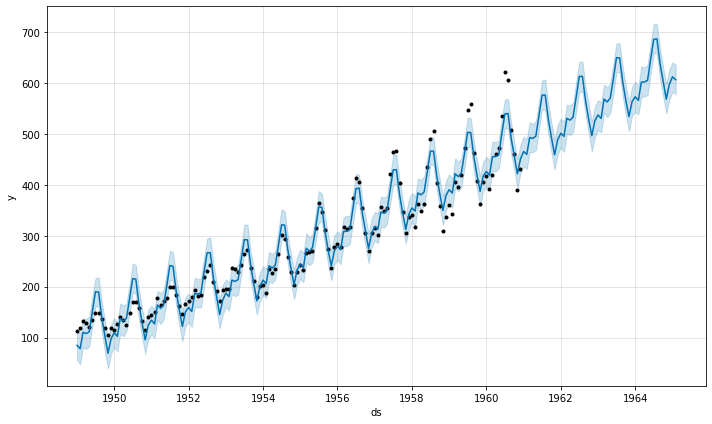

In [19]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=50,freq="MS")
forecast = m.predict(future)
fig = m.plot(forecast)

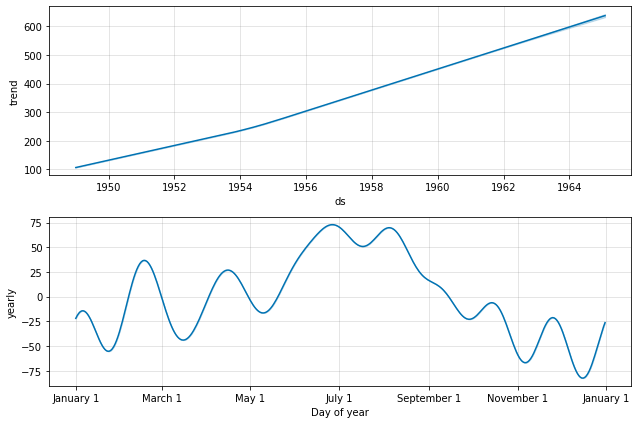

In [21]:
m.plot_components(forecast);

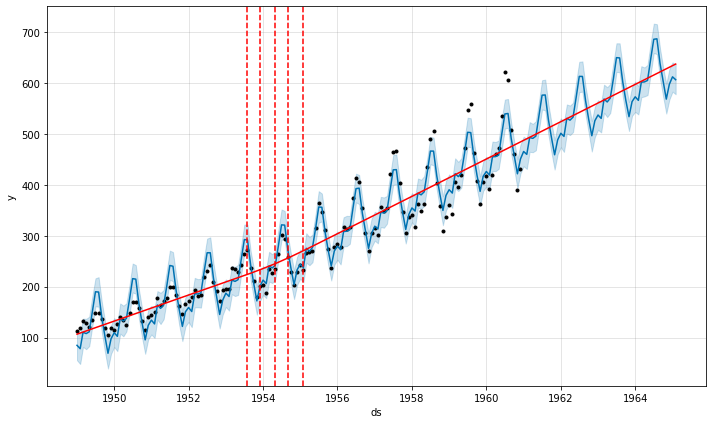

In [22]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


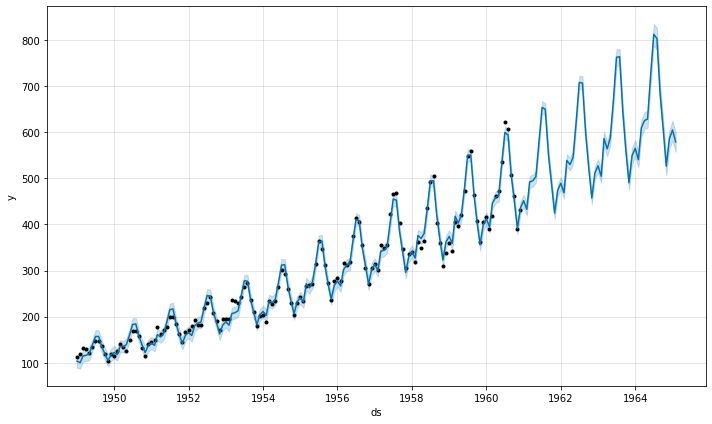

In [23]:
# Lets change our seasonality mode now, as the above graph suggesting its not completely additive:
# As seasonality components are getting larger and larger with time, so:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=50,freq="MS")
forecast = m.predict(future)
fig = m.plot(forecast)

##### Note:

If you have confusion in add or mul seasonality mode to choose, create models in both add and mul mode and see which is giving better result on test data!

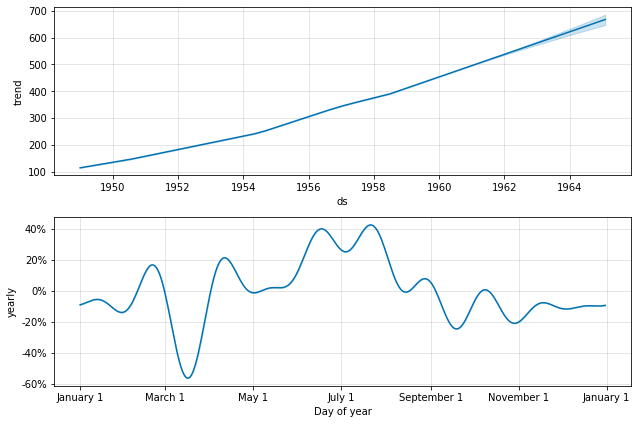

In [24]:
fig = m.plot_components(forecast)